In [245]:
import os
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, FloatType
from pyspark.sql.functions import split, count, when, isnan, col, regexp_replace

In [2]:
spark = SparkSession.builder.appName('First Session').getOrCreate()

print('Spark Version: {}'.format(spark.version))

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/30 12:46:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Spark Version: 3.3.1


In [4]:
import pyspark as sp

In [5]:
sc = sp.SparkContext.getOrCreate()
print(sc)
print(sc.version)

<SparkContext master=local[*] appName=First Session>
3.3.1


In [6]:
from pyspark.sql import SparkSession

#Create my_spark
spark = SparkSession.builder.getOrCreate()

#print my_spark
print(spark)

## Importing the dataset

In [8]:
auto_mpg= spark.read.csv('/Users/iqrabismi/Desktop/auto-mpg.csv', header= True, inferSchema=True)

In [9]:
auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



### Data Exploration 

In [10]:
auto_mpg.filter('horsepower is NULL').show()

+---+---------+------------+----------+------+------------+----------+------+--------+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name|
+---+---------+------------+----------+------+------------+----------+------+--------+
+---+---------+------------+----------+------+------------+----------+------+--------+



In [32]:
def check_missing(dataframe):
    
    return dataframe.select([count(when(isnan(c) | col(c).isNull(), c)). \
                             alias(c) for c in dataframe.columns]).show()

check_missing(auto_mpg)  #hence no null values 

+---+---------+------------+----------+------+------------+----------+------+--------+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name|
+---+---------+------------+----------+------+------------+----------+------+--------+
|  0|        0|           0|         0|     0|           0|         0|     0|       0|
+---+---------+------------+----------+------+------------+----------+------+--------+



#### Checking for duplicate values

In [44]:
auto_mpg.groupBy(auto_mpg.columns).count().filter(col('count') >1).show()
# hence no duplicate values

+---+---------+------------+----------+------+------------+----------+------+--------+-----+
|mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|car name|count|
+---+---------+------------+----------+------+------------+----------+------+--------+-----+
+---+---------+------------+----------+------+------------+----------+------+--------+-----+



In [11]:
auto_mpg.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|summary|               mpg|         cylinders|      displacement|        horsepower|           weight|      acceleration|        model year|            origin|            car name|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|  count|               398|               398|               398|               398|              398|               398|               398|               398|                 398|
|   mean|23.514572864321615| 5.454773869346734|193.42587939698493|104.46938775510205|2970.424623115578|15.568090452261291| 76.01005025125629|1.5728643216080402|                null|
| stddev| 7.815984312565783|1.7010042445332123|104.26983817119587| 38.49115993282846|846.8

In [120]:
auto_mpg.createOrReplaceTempView("auto_tables")


In [18]:
auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



#### average horsepower

In [16]:
avg_hp= spark.sql('select avg(horsepower) from auto_tables')

In [17]:
avg_hp.show()

+------------------+
|   avg(horsepower)|
+------------------+
|104.46938775510205|
+------------------+



#### average displacement

In [19]:
avg_displacement= spark.sql('select avg(displacement) from auto_tables')

In [20]:
avg_displacement.show()

+------------------+
| avg(displacement)|
+------------------+
|193.42587939698493|
+------------------+



#### average weight

In [21]:
avg_weight= spark.sql('select avg(weight) from auto_tables')

In [22]:
avg_weight.show()

+-----------------+
|      avg(weight)|
+-----------------+
|2970.424623115578|
+-----------------+



#### average weight

In [23]:
average_accelaration= spark.sql('select avg(weight) from auto_tables')

In [24]:
average_accelaration.show()

+-----------------+
|      avg(weight)|
+-----------------+
|2970.424623115578|
+-----------------+



#### average mpg

In [25]:
average_mpg= spark.sql('select avg(mpg) from auto_tables')

In [26]:
average_mpg.show()

+------------------+
|          avg(mpg)|
+------------------+
|23.514572864321615|
+------------------+



#### average cylinders

In [29]:
average_cylinders= spark.sql('select avg(cylinders) from auto_tables')

In [30]:
average_cylinders.show()

+-----------------+
|   avg(cylinders)|
+-----------------+
|5.454773869346734|
+-----------------+



#### checking for datatypes 

In [45]:
auto_mpg.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- displacement: double (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- model year: integer (nullable = true)
 |-- origin: integer (nullable = true)
 |-- car name: string (nullable = true)



In [70]:
# changing the dataype of housepower to double
auto_mpg= auto_mpg.withColumn('horsepower', auto_mpg.horsepower.cast('double'))


In [71]:
auto_mpg.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- displacement: double (nullable = true)
 |-- horsepower: double (nullable = true)
 |-- weight: integer (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- model year: integer (nullable = true)
 |-- origin: integer (nullable = true)
 |-- car name: string (nullable = true)



#### Setting the partitions to 500

In [46]:
spark.conf.get("spark.sql.shuffle.partitions")

'200'

In [47]:
spark.conf.set("spark.sql.shuffle.partitions", 500)

#### checking the data distribution by converting to Pandas

In [73]:
df =auto_mpg.toPandas()

In [50]:
import matplotlib.pyplot as plt

In [53]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<AxesSubplot:>

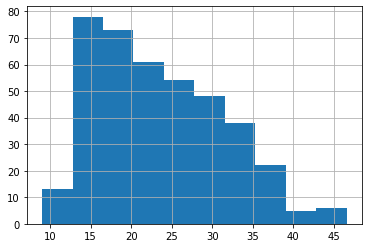

In [52]:
df.mpg.hist()

In [56]:
import seaborn as sns

<AxesSubplot:xlabel='cylinders', ylabel='count'>

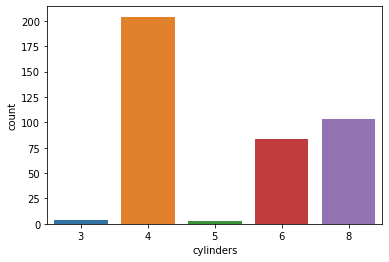

In [57]:
sns.countplot(df.cylinders)

<AxesSubplot:>

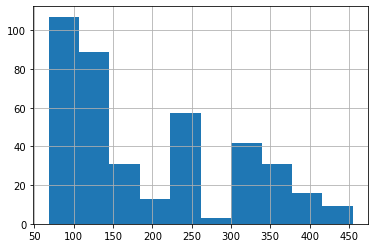

In [58]:
df.displacement.hist()

<AxesSubplot:>

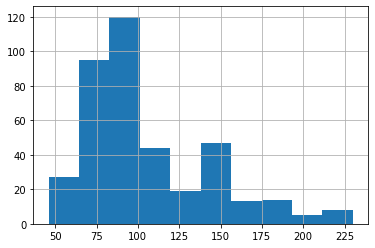

In [74]:
df.horsepower.hist()

<AxesSubplot:>

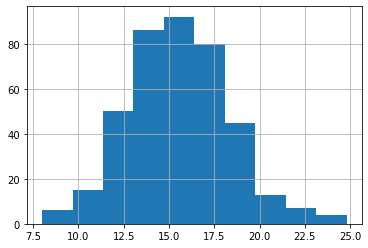

In [75]:
df.acceleration.hist()

<AxesSubplot:>

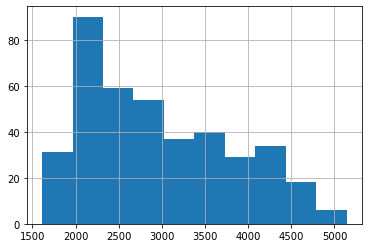

In [77]:
df.weight.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

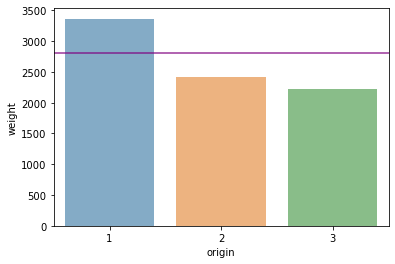

In [155]:
sns.barplot(data= df, x= 'origin', y= 'weight', ci=None, alpha= 0.6)
import numpy as np
plt.axhline(np.median(df['weight']), color= 'purple', alpha= 0.8)
plt.show

#### Renaming the columns in spark dataframe

In [78]:
auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [79]:
auto_mpg= auto_mpg.withColumnRenamed('car name','car_name').withColumnRenamed('model year', 'model_year')

In [80]:
auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



### Basic spark operations 

In [92]:
from pyspark.sql.functions import min,max,avg,count,sum, col

#### Number of cars wrt to Model Year

In [88]:
auto_mpg.groupBy('model_year').count().sort('count' , ascending=False).show(10)

+----------+-----+
|model_year|count|
+----------+-----+
|        73|   40|
|        78|   36|
|        76|   34|
|        82|   31|
|        75|   30|
|        80|   29|
|        70|   29|
|        81|   29|
|        79|   29|
|        72|   28|
+----------+-----+
only showing top 10 rows



In [85]:
auto_mpg.groupBy('model_year').count().select(avg('count')).show()

+------------------+
|        avg(count)|
+------------------+
|30.615384615384617|
+------------------+



In [89]:
auto_mpg.groupBy('model_year').count().select(min('count')).show()

+----------+
|min(count)|
+----------+
|        27|
+----------+



#### Car with min HP

In [110]:
minval= auto_mpg.select(min(col('horsepower'))).show()

+---------------+
|min(horsepower)|
+---------------+
|           46.0|
+---------------+



In [109]:
auto_mpg.filter(col('horsepower')== 46.0).select('car_name').show()

+--------------------+
|            car_name|
+--------------------+
|volkswagen 1131 d...|
|volkswagen super ...|
+--------------------+



#### Car with max HP

In [112]:
maxval= auto_mpg.select(max(col('horsepower'))).show()

+---------------+
|max(horsepower)|
+---------------+
|          230.0|
+---------------+



In [113]:
auto_mpg.filter(col('horsepower')== 230.0).select('car_name').show()

+------------------+
|          car_name|
+------------------+
|pontiac grand prix|
+------------------+



#### Number of cars with HP > avg(HP)

In [114]:
avgval= auto_mpg.select(avg(col('horsepower'))).show()

+------------------+
|   avg(horsepower)|
+------------------+
|104.46938775510205|
+------------------+



In [117]:
auto_mpg.filter(col('horsepower')> 104.46938775510205).select('car_name').count()

148

#### Using SQL in Pyspark

In [118]:
auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [128]:
spark.sql('select car_name, model_year from auto_tables where horsepower> 104.46938775510205 and weight> 2970.424623115578').show()

+--------------------+----------+
|            car_name|model_year|
+--------------------+----------+
|chevrolet chevell...|        70|
|   buick skylark 320|        70|
|  plymouth satellite|        70|
|       amc rebel sst|        70|
|         ford torino|        70|
|    ford galaxie 500|        70|
|    chevrolet impala|        70|
|   plymouth fury iii|        70|
|    pontiac catalina|        70|
|  amc ambassador dpl|        70|
| dodge challenger se|        70|
|  plymouth 'cuda 340|        70|
|chevrolet monte c...|        70|
|buick estate wago...|        70|
|           ford f250|        70|
|           chevy c20|        70|
|          dodge d200|        70|
|            hi 1200d|        70|
|plymouth satellit...|        71|
|    chevrolet impala|        71|
+--------------------+----------+
only showing top 20 rows



#### Car with HP > 80 and weight >2k 

In [129]:
spark.sql('select car_name, model_year from auto_tables where horsepower> 80 and weight> 2000').show()

+--------------------+----------+
|            car_name|model_year|
+--------------------+----------+
|chevrolet chevell...|        70|
|   buick skylark 320|        70|
|  plymouth satellite|        70|
|       amc rebel sst|        70|
|         ford torino|        70|
|    ford galaxie 500|        70|
|    chevrolet impala|        70|
|   plymouth fury iii|        70|
|    pontiac catalina|        70|
|  amc ambassador dpl|        70|
| dodge challenger se|        70|
|  plymouth 'cuda 340|        70|
|chevrolet monte c...|        70|
|buick estate wago...|        70|
|toyota corona mar...|        70|
|     plymouth duster|        70|
|          amc hornet|        70|
|       ford maverick|        70|
|        datsun pl510|        70|
|         peugeot 504|        70|
+--------------------+----------+
only showing top 20 rows



#### Most common Model Year in all Cars

In [131]:
spark.sql('select model_year, count(*) from auto_tables group by 1 order by 2 desc').show()

+----------+--------+
|model_year|count(1)|
+----------+--------+
|        73|      40|
|        78|      36|
|        76|      34|
|        82|      31|
|        75|      30|
|        70|      29|
|        81|      29|
|        79|      29|
|        80|      29|
|        71|      28|
|        72|      28|
|        77|      28|
|        74|      27|
+----------+--------+



#### Most commong Model and cars 

In [132]:
spark.sql('select car_name,model_year, count(*) from auto_tables group by 1,2 order by 3 desc').show()

+--------------------+----------+--------+
|            car_name|model_year|count(1)|
+--------------------+----------+--------+
|          ford pinto|        75|       2|
|    plymouth reliant|        81|       2|
|        ford granada|        77|       1|
|        datsun pl510|        70|       1|
|         amc gremlin|        70|       1|
|    chevrolet malibu|        73|       1|
|  honda civic (auto)|        82|       1|
|         fiat 124 tc|        74|       1|
|     mazda rx2 coupe|        72|       1|
|       toyota corona|        74|       1|
| plymouth grand fury|        75|       1|
| ford pinto runabout|        72|       1|
|       ford maverick|        73|       1|
|chevrolet caprice...|        77|       1|
|oldsmobile cutlas...|        78|       1|
|     ford granada gl|        81|       1|
|    cadillac seville|        76|       1|
| toyota corolla 1200|        71|       1|
|chrysler newport ...|        72|       1|
|   volkswagen dasher|        75|       1|
+----------

#### Avg HP wrt Model and cars 

In [133]:
spark.sql('select car_name,model_year, avg(horsepower) from auto_tables group by 1,2 order by 3 desc').show()

+--------------------+----------+---------------+
|            car_name|model_year|avg(horsepower)|
+--------------------+----------+---------------+
|  pontiac grand prix|        73|          230.0|
|buick electra 225...|        73|          225.0|
|buick estate wago...|        70|          225.0|
|    pontiac catalina|        70|          225.0|
|    chevrolet impala|        70|          220.0|
|   plymouth fury iii|        70|          215.0|
|chrysler new york...|        73|          215.0|
|           ford f250|        70|          215.0|
|          dodge d200|        70|          210.0|
|     mercury marquis|        72|          208.0|
|           chevy c20|        70|          200.0|
|    ford galaxie 500|        70|          198.0|
|mercury marquis b...|        73|          198.0|
|            hi 1200d|        70|          193.0|
|  amc ambassador dpl|        70|          190.0|
|chrysler newport ...|        72|          190.0|
|    chrysler cordoba|        77|          190.0|


#### cars with orgin= 2

In [135]:
auto_mpg.filter(col('origin')==2).show(10)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|26.0|        4|        97.0|      46.0|  1835|        20.5|        70|     2|volkswagen 1131 d...|
|25.0|        4|       110.0|      87.0|  2672|        17.5|        70|     2|         peugeot 504|
|24.0|        4|       107.0|      90.0|  2430|        14.5|        70|     2|         audi 100 ls|
|25.0|        4|       104.0|      95.0|  2375|        17.5|        70|     2|            saab 99e|
|26.0|        4|       121.0|     113.0|  2234|        12.5|        70|     2|            bmw 2002|
|28.0|        4|       116.0|      90.0|  2123|        14.0|        71|     2|           opel 1900|
|30.0|        4|        79.0|      70.0|  2074|        19.5|        71|     2|         peugeot 304|


#### cars with orgin= 3

In [139]:
auto_mpg.filter(col('origin')==3).show(10)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|24.0|        4|       113.0|      95.0|  2372|        15.0|        70|     3|toyota corona mar...|
|27.0|        4|        97.0|      88.0|  2130|        14.5|        70|     3|        datsun pl510|
|27.0|        4|        97.0|      88.0|  2130|        14.5|        71|     3|        datsun pl510|
|25.0|        4|       113.0|      95.0|  2228|        14.0|        71|     3|       toyota corona|
|31.0|        4|        71.0|      65.0|  1773|        19.0|        71|     3| toyota corolla 1200|
|35.0|        4|        72.0|      69.0|  1613|        18.0|        71|     3|         datsun 1200|
|24.0|        4|       113.0|      95.0|  2278|        15.5|        72|     3|toyota corona har...|


#### Number of distinct origin

In [138]:
auto_mpg.groupBy('origin').count().show()

+------+-----+
|origin|count|
+------+-----+
|     1|  249|
|     3|   79|
|     2|   70|
+------+-----+



#### Avg HP, Weight and displacement wrt origin, model_year, car_name

In [142]:
auto_mpg.groupBy(['origin','model_year','car_name']).avg('horsepower', 'weight','displacement').show()

+------+----------+--------------------+---------------+-----------+-----------------+
|origin|model_year|            car_name|avg(horsepower)|avg(weight)|avg(displacement)|
+------+----------+--------------------+---------------+-----------+-----------------+
|     1|        70|       amc rebel sst|          150.0|     3433.0|            304.0|
|     1|        75|       plymouth fury|           95.0|     3785.0|            225.0|
|     2|        75|          audi 100ls|           95.0|     2694.0|            115.0|
|     3|        78|       toyota corona|           95.0|     2560.0|            134.0|
|     2|        80|renault lecar deluxe|           null|     1835.0|             85.0|
|     2|        74|   volkswagen dasher|           67.0|     1963.0|             79.0|
|     3|        76|      toyota mark ii|          108.0|     2930.0|            156.0|
|     3|        78|      datsun b210 gx|           70.0|     2070.0|             85.0|
|     1|        73|  pontiac grand prix|   

In [156]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### Number of cars with name Toyota

In [157]:
auto_mpg.filter(col('car_name').like('%toyota%')).show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|24.0|        4|       113.0|      95.0|  2372|        15.0|        70|     3|toyota corona mar...|
|25.0|        4|       113.0|      95.0|  2228|        14.0|        71|     3|       toyota corona|
|31.0|        4|        71.0|      65.0|  1773|        19.0|        71|     3| toyota corolla 1200|
|24.0|        4|       113.0|      95.0|  2278|        15.5|        72|     3|toyota corona har...|
|27.0|        4|        97.0|      88.0|  2100|        16.5|        72|     3|toyota corolla 16...|
|20.0|        4|        97.0|      88.0|  2279|        19.0|        73|     3|       toyota carina|
|20.0|        6|       156.0|     122.0|  2807|        13.5|        73|     3|      toyota mark ii|


In [159]:
auto_mpg.filter(col('car_name').like('%toyota%')).count()

25

#### making the car name in title form

In [167]:
import pyspark.sql.functions as F

In [177]:
spark.sql('select initcap(car_name) from auto_tables').show()

+--------------------+
|   initcap(car_name)|
+--------------------+
|Chevrolet Chevell...|
|   Buick Skylark 320|
|  Plymouth Satellite|
|       Amc Rebel Sst|
|         Ford Torino|
|    Ford Galaxie 500|
|    Chevrolet Impala|
|   Plymouth Fury Iii|
|    Pontiac Catalina|
|  Amc Ambassador Dpl|
| Dodge Challenger Se|
|  Plymouth 'cuda 340|
|Chevrolet Monte C...|
|Buick Estate Wago...|
|Toyota Corona Mar...|
|     Plymouth Duster|
|          Amc Hornet|
|       Ford Maverick|
|        Datsun Pl510|
|Volkswagen 1131 D...|
+--------------------+
only showing top 20 rows



In [185]:
auto_mpg.filter(auto_mpg['car_name'].contains('volkswagen')). \
orderBy(['model_year', 'horsepower'], ascending=[False, False]).show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|36.0|        4|       105.0|      74.0|  1980|        15.3|        82|     2| volkswagen rabbit l|
|33.0|        4|       105.0|      74.0|  2190|        14.2|        81|     2|    volkswagen jetta|
|31.5|        4|        89.0|      71.0|  1990|        14.9|        78|     2| volkswagen scirocco|
|43.1|        4|        90.0|      48.0|  1985|        21.5|        78|     2|volkswagen rabbit...|
|29.0|        4|        97.0|      78.0|  1940|        14.5|        77|     2|volkswagen rabbit...|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



#### Filtering on Mpg and Acceleration

In [186]:
auto_mpg.filter('mpg > 22 and acceleration < 15').show(5)

+----+---------+------------+----------+------+------------+----------+------+-------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|     car_name|
+----+---------+------------+----------+------+------------+----------+------+-------------+
|27.0|        4|        97.0|      88.0|  2130|        14.5|        70|     3| datsun pl510|
|24.0|        4|       107.0|      90.0|  2430|        14.5|        70|     2|  audi 100 ls|
|26.0|        4|       121.0|     113.0|  2234|        12.5|        70|     2|     bmw 2002|
|27.0|        4|        97.0|      88.0|  2130|        14.5|        71|     3| datsun pl510|
|25.0|        4|       113.0|      95.0|  2228|        14.0|        71|     3|toyota corona|
+----+---------+------------+----------+------+------------+----------+------+-------------+
only showing top 5 rows



#### Filtering on ~ Null HP

In [194]:
auto_mpg.filter(~ auto_mpg.horsepower.isNull()).show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|            car_name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [195]:
auto_mpg.filter(~ auto_mpg.horsepower.isNull()).count()

392

In [196]:
auto_mpg.count()

398

#### Number of Null values in HP

In [197]:
total_null= auto_mpg.count()- auto_mpg.filter(~ auto_mpg.horsepower.isNull()).count()
print('there are total {} nulls in HorsePower'.format(total_null))

there are total 6 nulls in HorsePower


#### Filtering by when and otherwise condition and using alias to name a column

In [203]:
auto_mpg.select(auto_mpg.car_name, auto_mpg.model_year, F.when(auto_mpg.car_name.like('%toyota%'), 'Yes').otherwise('No').alias('Totoya Car or Not')).show()

+--------------------+----------+-----------------+
|            car_name|model_year|Totoya Car or Not|
+--------------------+----------+-----------------+
|chevrolet chevell...|        70|               No|
|   buick skylark 320|        70|               No|
|  plymouth satellite|        70|               No|
|       amc rebel sst|        70|               No|
|         ford torino|        70|               No|
|    ford galaxie 500|        70|               No|
|    chevrolet impala|        70|               No|
|   plymouth fury iii|        70|               No|
|    pontiac catalina|        70|               No|
|  amc ambassador dpl|        70|               No|
| dodge challenger se|        70|               No|
|  plymouth 'cuda 340|        70|               No|
|chevrolet monte c...|        70|               No|
|buick estate wago...|        70|               No|
|toyota corona mar...|        70|              Yes|
|     plymouth duster|        70|               No|
|          a

In [209]:
auto_mpg.select(auto_mpg.car_name, auto_mpg.model_year, F.when(auto_mpg.horsepower >= 140, "Good")
.when(auto_mpg.horsepower <50, "Bad").otherwise('Fair').alias('performance')).show()

+--------------------+----------+-----------+
|            car_name|model_year|performance|
+--------------------+----------+-----------+
|chevrolet chevell...|        70|       Fair|
|   buick skylark 320|        70|       Good|
|  plymouth satellite|        70|       Good|
|       amc rebel sst|        70|       Good|
|         ford torino|        70|       Good|
|    ford galaxie 500|        70|       Good|
|    chevrolet impala|        70|       Good|
|   plymouth fury iii|        70|       Good|
|    pontiac catalina|        70|       Good|
|  amc ambassador dpl|        70|       Good|
| dodge challenger se|        70|       Good|
|  plymouth 'cuda 340|        70|       Good|
|chevrolet monte c...|        70|       Good|
|buick estate wago...|        70|       Good|
|toyota corona mar...|        70|       Fair|
|     plymouth duster|        70|       Fair|
|          amc hornet|        70|       Fair|
|       ford maverick|        70|       Fair|
|        datsun pl510|        70| 

#### Number of cars with good, bad and fair performance

In [208]:
auto_mpg.select(auto_mpg.car_name, auto_mpg.model_year, F.when(auto_mpg.horsepower >= 140, "Good")
.when(auto_mpg.horsepower < 50, "Bad").otherwise('Fair').alias('performance')).groupBy('performance').count().show()

+-----------+-----+
|performance|count|
+-----------+-----+
|       Fair|  308|
|       Good|   84|
|        Bad|    6|
+-----------+-----+



#### Improving performance by caching

In [230]:
import time

In [231]:
start= time.time()
cachedresults= auto_mpg.describe().cache() # caching the results before Action
print("time taken is: ", cachedresults.show(),time.time()- start)

22/12/30 16:13:14 WARN CacheManager: Asked to cache already cached data.
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|summary|               mpg|         cylinders|      displacement|        horsepower|           weight|      acceleration|        model_year|            origin|            car_name|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|  count|               398|               398|               398|               392|              398|               398|               398|               398|                 398|
|   mean|23.514572864321615| 5.454773869346734|193.42587939698493|104.46938775510205|2970.424623115578|15.568090452261291| 76.01005025125629|1.5728643216080402|                null|
| stddev| 7.81598

In [232]:
start= time.time()
print("time taken is: ",cachedresults.show(), time.time()- start)

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|summary|               mpg|         cylinders|      displacement|        horsepower|           weight|      acceleration|        model_year|            origin|            car_name|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+
|  count|               398|               398|               398|               392|              398|               398|               398|               398|                 398|
|   mean|23.514572864321615| 5.454773869346734|193.42587939698493|104.46938775510205|2970.424623115578|15.568090452261291| 76.01005025125629|1.5728643216080402|                null|
| stddev| 7.815984312565783|1.7010042445332123|104.26983817119587| 38.49115993282846|846.8

In [227]:
### Hence time decreased

In [228]:
# Results can be uncached by using unpersist()

In [233]:
cachedresults.unpersist()

DataFrame[summary: string, mpg: string, cylinders: string, displacement: string, horsepower: string, weight: string, acceleration: string, model_year: string, origin: string, car_name: string]

In [236]:
cachedresults.is_cached ## checking whether it is cached or not

False

#### Replacing Misspelled Brands

In [238]:
auto_mpg = auto_mpg.withColumn('brand', split(auto_mpg['car_name'], ' ').getItem(0)).drop('car_name')


auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

for key in auto_misspelled.keys():
    
    auto_mpg = auto_mpg.withColumn('brand', regexp_replace('brand', key, auto_misspelled[key]))

auto_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+---------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model_year|origin|    brand|
+----+---------+------------+----------+------+------------+----------+------+---------+
|18.0|        8|       307.0|     130.0|  3504|        12.0|        70|     1|chevrolet|
|15.0|        8|       350.0|     165.0|  3693|        11.5|        70|     1|    buick|
|18.0|        8|       318.0|     150.0|  3436|        11.0|        70|     1| plymouth|
|16.0|        8|       304.0|     150.0|  3433|        12.0|        70|     1|      amc|
|17.0|        8|       302.0|     140.0|  3449|        10.5|        70|     1|     ford|
+----+---------+------------+----------+------+------------+----------+------+---------+
only showing top 5 rows



#### Avg Acceleration and Horsepower by car brands

In [241]:
auto_mpg.groupBy('brand').agg({'acceleration': 'mean', 'horsepower': 'mean'}).show(5)

+--------+------------------+------------------+
|   brand| avg(acceleration)|   avg(horsepower)|
+--------+------------------+------------------+
|    ford|15.378431372549018|112.22916666666667|
|   capri|              14.9|              92.0|
| mercury|14.963636363636363|119.81818181818181|
|plymouth|14.851612903225801|111.41935483870968|
|   dodge|14.460714285714284|117.17857142857143|
+--------+------------------+------------------+
only showing top 5 rows



#### Max MPG by car brands

In [243]:

auto_mpg.groupBy('brand').max('mpg').show(5)

+--------+--------+
|   brand|max(mpg)|
+--------+--------+
|    ford|    36.1|
|   capri|    25.0|
| mercury|    36.0|
|plymouth|    39.0|
|   dodge|    36.0|
+--------+--------+
only showing top 5 rows



In [244]:
#End Session
spark.stop()